In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/DL_IM_dataset.csv')
df.head()

,rating,review
0,5,frozen order selector
1,5,night stock
2,5,deep learning internship during summers
3,5,dior uk
4,5,awesome teaching position


In [ ]:
df.columns

Index(['rating', 'review'], dtype='object')

In [ ]:
df['review']=df['review'].astype(str).str.lower()

In [ ]:
df['rating'].value_counts()

,count
rating,
4,813480
3,677900
5,542320
2,406740
1,271160


In [ ]:
n = 8
for rating in range(1, 6):
    filtered_reviews = df[df['rating'] == rating]['review'].dropna()
    sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=rating)

    # Print results
    print(f"\nShowing {min(n, len(filtered_reviews))} sample review(s) for Rating {rating}:\n")
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review.strip()}\n")


Showing 8 sample review(s) for Rating 1:

1. ignorate undermanagment

2. lack of quality leadership

3. keystone cops

4. travesty to work for

5. international brand ambassador

6. toxic culture of bullying

7. mutton dressed as lamb

8. not the worst job in life but they treat you like trash


Showing 8 sample review(s) for Rating 2:

1. if you dont want to be tide down dont take the job and regret it

2. not a good place if you are looking for a rewarding job or career

3. tree of life must be preserved

4. reputation but the worst place for career advancement development

5. culturalmanagement overhaul needed in high point

6. i work here

7. ok for parttime college job

8. ipsos mumbai is the worst place to work especially the qual uu team


Showing 8 sample review(s) for Rating 3:

1. not sure what direction this company is going

2. gp partner

3. pretty nice

4. low salaries but travel benefit perks

5. lacking leadership and direction

6. a pleased employee

7. fun environmen

In [ ]:
short_counts = df[df['review'].apply(lambda x: len(str(x).split()) < 3)] \
                .groupby('rating').size().reset_index(name='count_less_than_3_words')

print(short_counts)
long_counts = df[df['review'].apply(lambda x: len(str(x).split()) > 50)] \
               .groupby('rating').size().reset_index(name='count_long_reviews')

print(long_counts)

   rating  count_less_than_3_words
0       1                    43569
1       2                    65974
2       3                   110594
3       4                   130340
4       5                    99764
   rating  count_long_reviews
0       1                  14
1       2                  13
2       3                   9
3       4                   3
4       5                   4


TRAIN TEST SPLIT

In [ ]:

from sklearn.model_selection import train_test_split

# Suppose 'df' has columns: 'review' and 'rating'

# Features (X) and labels (y)
X = df['review']
y = df['rating']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Optionally combine X and y back into DataFrames
train_df = pd.DataFrame({'review': X_train, 'rating': y_train})
test_df = pd.DataFrame({'review': X_test, 'rating': y_test})

Bi LSTM

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,659,461 (10.15 MB)

 Trainable params: 2,659,461 (10.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 311s 20ms/step - accuracy: 0.4185 - loss: 1.2881 - val_accuracy: 0.4421 - val_loss: 1.2344
Epoch 2/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 309s 20ms/step - accuracy: 0.4481 - loss: 1.2255 - val_accuracy: 0.4443 - val_loss: 1.2268
Epoch 3/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 324s 20ms/step - accuracy: 0.4570 - loss: 1.2085 - val_accuracy: 0.4464 - val_loss: 1.2243
Epoch 4/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 319s 20ms/step - accuracy: 0.4635 - loss: 1.1948 - val_accuracy: 0.4456 - val_loss: 1.2265
Epoch 5/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 323s 20ms/step - accuracy: 0.4707 - loss: 1.1819 - val_accuracy: 0.4459 - val_loss: 1.2288
16948/16948 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step
Accuracy: 0.4471
Classification Report:

              precision    recall  f1-score   support

           1       0.58      0.36      0.45     54232
           2       0.40      0.33      0.36     81348
           3       0.42      0.37      0.39    135580
           4       0.42   

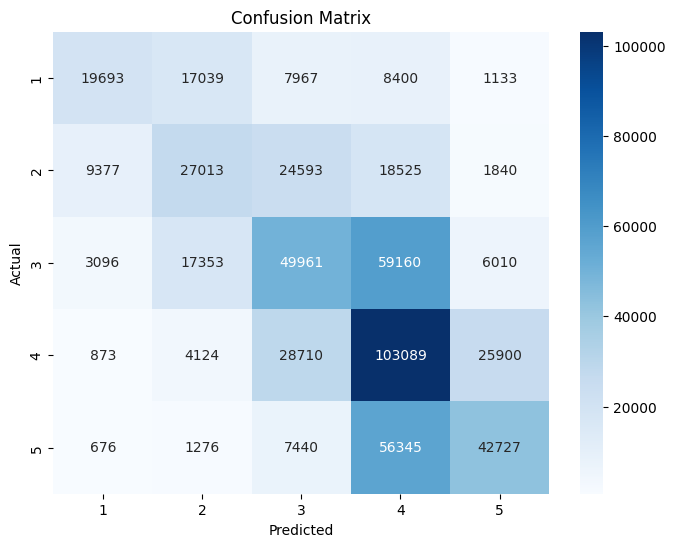

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the dataframe
df=pd.read_csv('/content/drive/MyDrive/DL_IM_dataset.csv')

# ----------------------
# Prepare data
# ----------------------
# Convert 'review' column to string and fill potential NaN values
df['review'] = df['review'].astype(str).fillna('')

X = df['review']
y = df['rating']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical,
    test_size=0.2,
    stratify=y_categorical,
    random_state=42
)

# Tokenization and padding
max_words = 20000
max_len = 150

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# ----------------------
# Build BiLSTM Model
# ----------------------
embedding_dim = 128
lstm_units = 64
num_classes = y_categorical.shape[1]

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Build model to show correct summary
model.build(input_shape=(None, max_len))
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ----------------------
# Train Model
# ----------------------
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

# ----------------------
# Evaluate Model
# ----------------------
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}")

# Precision, Recall, F1-Score
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in le.classes_]))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

SAVING THE MODEL

In [ ]:
model.save('Model_A.h5')

In [ ]:
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# 3. Save Label Encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


MODEL B ON IMBALANCED DATASET

16948/16948 ━━━━━━━━━━━━━━━━━━━━ 762s 45ms/step
Accuracy: 0.47282785071544475

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.39      0.48     54232
           2       0.46      0.28      0.35     81348
           3       0.44      0.42      0.43    135580
           4       0.44      0.68      0.53    162696
           5       0.59      0.41      0.48    108464

    accuracy                           0.47    542320
   macro avg       0.51      0.44      0.46    542320
weighted avg       0.49      0.47      0.46    542320



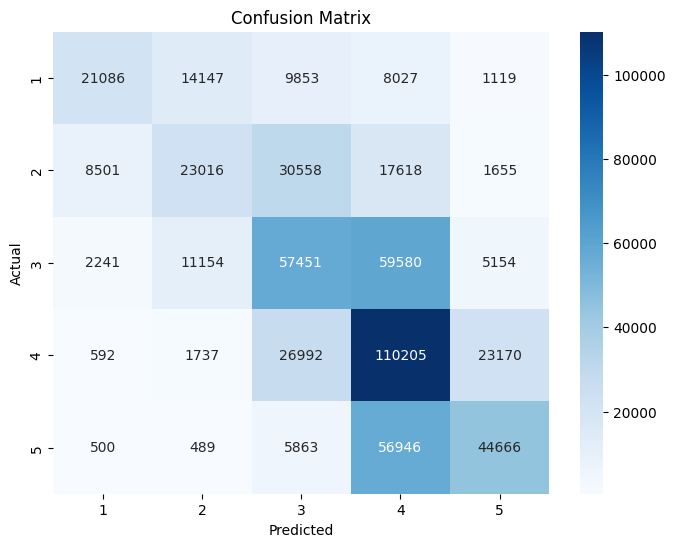

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle




X = df['review']
y = df['rating']
with open('label_encoder2.pkl', 'rb') as f:
    le = pickle.load(f)
y_encoded = le.fit_transform(y)


# --- Stratified split ---
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# --- One-hot encode (if needed for model) ---
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test_raw)

# --- Load model and tokenizer and label encoder ---
model = load_model('Model_B.h5')

with open('tokenizer2.pkl', 'rb') as f:
    tokenizer = pickle.load(f)





# --- Prepare test data ---
max_len = 150  # must match training
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# --- Predict ---
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test_raw   # original label numeric

# --- Evaluation Metrics ---
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_.astype(str)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/DL_IM_dataset.csv')
df.to_csv(' DL IMBALANCED_TRAIN_TEST.csv',index=False)